In [133]:
import warnings

warnings.filterwarnings('ignore')

In [134]:
import yfinance as yf
start_date = '2010-01-01'
end_date = '2024-01-01'

df = yf.download('TSLA', start=start_date, end=end_date).reset_index()
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3395,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
3396,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
3397,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
3398,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900


In [135]:
df_open = df['Open'].tolist()

In [136]:
split_data = round(len(df_open)*0.8)
split_data

2720

In [137]:
train_data = df_open[:split_data]
test_data = df_open[split_data:]
print(f'total data is {len(df_open)} \nthe length of train data is {len(train_data)} \nthe length of test data is {len(test_data)}')

total data is 3400 
the length of train data is 2720 
the length of test data is 680


In [138]:
train_data

[1.2666670083999634,
 1.7193330526351929,
 1.6666669845581055,
 1.5333329439163208,
 1.3333330154418945,
 1.0933330059051514,
 1.0759999752044678,
 1.1720000505447388,
 1.196666955947876,
 1.1593329906463623,
 1.1959999799728394,
 1.329332947731018,
 1.3799999952316284,
 1.4246670007705688,
 1.4566669464111328,
 1.3773330450057983,
 1.3666670322418213,
 1.4126670360565186,
 1.4333330392837524,
 1.3940000534057617,
 1.3700000047683716,
 1.3846670389175415,
 1.3466670513153076,
 1.3666670322418213,
 1.399999976158142,
 1.463333010673523,
 1.4359999895095825,
 1.340000033378601,
 1.3266669511795044,
 1.309999942779541,
 1.246000051498413,
 1.1866669654846191,
 1.2120000123977661,
 1.2300000190734863,
 1.2640000581741333,
 1.305999994277954,
 1.2359999418258667,
 1.2433329820632935,
 1.2726670503616333,
 1.2833329439163208,
 1.2773330211639404,
 1.3259999752044678,
 1.3166669607162476,
 1.3133330345153809,
 1.3106670379638672,
 1.3079999685287476,
 1.3580000400543213,
 1.391332983970642,
 

### normalization

In [139]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#for normalization, we need 2d array so that apply reshape -1,1 with help of np.array
train_data = np.array(train_data).reshape(-1,1)
test_data = np.array(test_data).reshape(-1,1)

#again converting back to 1d array
train_data_scaled = scaler.fit_transform(train_data).flatten()
test_data_scaled = scaler.fit_transform(test_data).flatten()

In [140]:
train_data_scaled

array([6.44035116e-04, 2.17305051e-03, 1.99515506e-03, ...,
       8.33046552e-01, 8.16776819e-01, 8.06587135e-01])

In [141]:
test_data_scaled

array([0.44133951, 0.42766992, 0.46736043, 0.44391135, 0.46682011,
       0.44192306, 0.41863608, 0.42198592, 0.38749311, 0.42662173,
       0.39975796, 0.40204883, 0.40172463, 0.38555884, 0.38458628,
       0.31363398, 0.31714592, 0.31611935, 0.29652803, 0.28803451,
       0.27987593, 0.26318065, 0.28744018, 0.31025169, 0.29457214,
       0.3223544 , 0.32262458, 0.33632662, 0.34525237, 0.34449594,
       0.33620776, 0.31640032, 0.29252979, 0.30562671, 0.33931986,
       0.3168001 , 0.31864795, 0.32550978, 0.32767096, 0.33249048,
       0.31179691, 0.31649757, 0.32890286, 0.34090836, 0.33417619,
       0.3490345 , 0.39548959, 0.41125555, 0.39186956, 0.40592816,
       0.40065483, 0.40513932, 0.39980115, 0.4027512 , 0.38390553,
       0.34511189, 0.37192164, 0.38166868, 0.40773278, 0.3909078 ,
       0.37755157, 0.37354254, 0.34675441, 0.37063572, 0.37886989,
       0.37544442, 0.36455194, 0.36953352, 0.38296538, 0.36524353,
       0.36825838, 0.39199921, 0.42251541, 0.44304688, 0.43440

### create windowed dataset

In [142]:
"""
    Creates a windowed dataset from the given data.

    Parameters:
    - data: numpy array or list, the input data.
    - window_size: int, the size of the window.

    Returns:
    - X: numpy array, containing input sequences.
    - y: numpy array, containing corresponding labels.
    """
def windowed_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size-1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [143]:
window_size = 50
X_train, y_train = windowed_dataset(train_data_scaled, window_size)
X_test, y_test = windowed_dataset(test_data_scaled, window_size)

In [144]:
X_train

array([[6.44035116e-04, 2.17305051e-03, 1.99515506e-03, ...,
        1.06513186e-03, 1.00658434e-03, 1.01784286e-03],
       [2.17305051e-03, 1.99515506e-03, 1.54477933e-03, ...,
        1.00658434e-03, 1.01784286e-03, 1.09440722e-03],
       [1.99515506e-03, 1.54477933e-03, 8.69219559e-04, ...,
        1.01784286e-03, 1.09440722e-03, 1.03810940e-03],
       ...,
       [9.13201733e-01, 9.47418864e-01, 9.83831545e-01, ...,
        7.59489358e-01, 7.68417984e-01, 7.98818185e-01],
       [9.47418864e-01, 9.83831545e-01, 9.59038505e-01, ...,
        7.68417984e-01, 7.98818185e-01, 8.64122302e-01],
       [9.83831545e-01, 9.59038505e-01, 9.47779137e-01, ...,
        7.98818185e-01, 8.64122302e-01, 8.33046552e-01]])

In [145]:
X_test

array([[0.44133951, 0.42766992, 0.46736043, ..., 0.41125555, 0.39186956,
        0.40592816],
       [0.42766992, 0.46736043, 0.44391135, ..., 0.39186956, 0.40592816,
        0.40065483],
       [0.46736043, 0.44391135, 0.46682011, ..., 0.40592816, 0.40065483,
        0.40513932],
       ...,
       [0.50539759, 0.47670763, 0.47686973, ..., 0.49732552, 0.48270494,
        0.49846017],
       [0.47670763, 0.47686973, 0.4852984 , ..., 0.48270494, 0.49846017,
        0.49110126],
       [0.47686973, 0.4852984 , 0.39858008, ..., 0.49846017, 0.49110126,
        0.50361463]])

### create RNN model

In [146]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential()
model.add(LSTM(units=window_size, activation='tanh', return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=window_size, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=window_size, activation='tanh'))

model.add(Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 50, 50)            10400     
                                                                 
 dropout_10 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 50, 50)            20200     
                                                                 
 dropout_11 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 5085

In [147]:
from keras.losses import Huber
model.compile(optimizer='sgd', loss = Huber(), metrics=['mae'])

In [148]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
84/84 [==============================] - 8s 54ms/step - loss: 0.0120 - mae: 0.0709 - val_loss: 0.0779 - val_mae: 0.3550
Epoch 2/100
84/84 [==============================] - 4s 48ms/step - loss: 0.0103 - mae: 0.0728 - val_loss: 0.0669 - val_mae: 0.3273
Epoch 3/100
84/84 [==============================] - 4s 43ms/step - loss: 0.0092 - mae: 0.0704 - val_loss: 0.0594 - val_mae: 0.3074
Epoch 4/100
84/84 [==============================] - 4s 44ms/step - loss: 0.0080 - mae: 0.0645 - val_loss: 0.0507 - val_mae: 0.2823
Epoch 5/100
84/84 [==============================] - 4s 45ms/step - loss: 0.0069 - mae: 0.0602 - val_loss: 0.0431 - val_mae: 0.2583
Epoch 6/100
84/84 [==============================] - 4s 44ms/step - loss: 0.0059 - mae: 0.0558 - val_loss: 0.0369 - val_mae: 0.2373
Epoch 7/100
84/84 [==============================] - 4s 45ms/step - loss: 0.0049 - mae: 0.0496 - val_loss: 0.0298 - val_mae: 0.2103
Epoch 8/100
84/84 [==============================] - 4s 46ms/step - loss: 0.

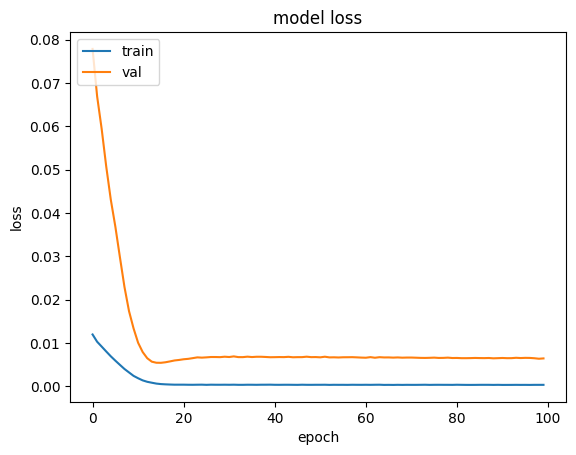

In [149]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

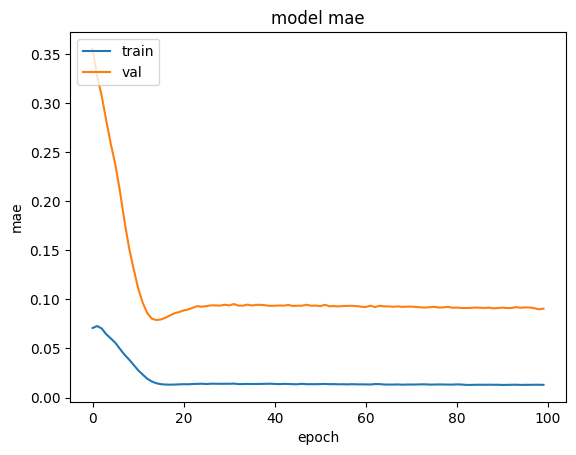

In [150]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [151]:
y_pred = model.predict(X_test)

#y_pred we got and it is minmaxscaled data so we need to transorm to oriignal
y_pred_org = scaler.inverse_transform(y_pred)

20/20 [==============================] - 3s 20ms/step


In [152]:
y_pred

array([[0.3912547 ],
       [0.39446518],
       [0.39813808],
       [0.4020924 ],
       [0.40626827],
       [0.41042328],
       [0.41423333],
       [0.41766888],
       [0.4207606 ],
       [0.42372552],
       [0.42650983],
       [0.4290859 ],
       [0.43137175],
       [0.43319246],
       [0.4346328 ],
       [0.4357887 ],
       [0.43676418],
       [0.43748444],
       [0.43799105],
       [0.4384087 ],
       [0.43869135],
       [0.43884856],
       [0.43903777],
       [0.43948433],
       [0.44042087],
       [0.44190204],
       [0.443893  ],
       [0.44633064],
       [0.44909987],
       [0.45212755],
       [0.45533144],
       [0.45859677],
       [0.46195123],
       [0.46526414],
       [0.4682287 ],
       [0.47067916],
       [0.47264984],
       [0.47417724],
       [0.47533193],
       [0.47633758],
       [0.47729206],
       [0.47827452],
       [0.4792735 ],
       [0.4803411 ],
       [0.48160768],
       [0.4831355 ],
       [0.48491064],
       [0.486

In [153]:
y_pred_org

array([[223.69032],
       [224.68066],
       [225.81364],
       [227.03345],
       [228.32156],
       [229.60327],
       [230.77855],
       [231.83832],
       [232.79202],
       [233.7066 ],
       [234.56548],
       [235.36014],
       [236.06525],
       [236.62688],
       [237.07118],
       [237.42773],
       [237.72865],
       [237.95082],
       [238.10709],
       [238.23593],
       [238.3231 ],
       [238.37161],
       [238.42998],
       [238.56772],
       [238.85663],
       [239.31352],
       [239.92766],
       [240.67961],
       [241.53383],
       [242.46777],
       [243.45609],
       [244.46335],
       [245.4981 ],
       [246.52003],
       [247.43451],
       [248.1904 ],
       [248.7983 ],
       [249.26945],
       [249.62564],
       [249.93585],
       [250.23029],
       [250.53334],
       [250.84149],
       [251.1708 ],
       [251.56152],
       [252.03279],
       [252.58038],
       [253.18471],
       [253.8513 ],
       [254.61731],


In [154]:
y_test_org = scaler.inverse_transform(y_test.reshape(-1,1))
y_test_org

array([[226.58999634],
       [227.97332764],
       [226.32666016],
       [227.23666382],
       [221.42333984],
       [209.45666504],
       [217.72666931],
       [220.7333374 ],
       [228.77333069],
       [223.58332825],
       [219.46333313],
       [218.22666931],
       [209.96333313],
       [217.33000183],
       [219.86999512],
       [218.81333923],
       [215.45333862],
       [216.99000549],
       [221.1333313 ],
       [215.66667175],
       [216.59666443],
       [223.91999817],
       [233.33332825],
       [239.66667175],
       [237.        ],
       [238.66667175],
       [237.30000305],
       [236.72332764],
       [237.99667358],
       [237.57000732],
       [235.44667053],
       [241.23666382],
       [235.02333069],
       [224.22000122],
       [223.25      ],
       [226.07000732],
       [227.6166687 ],
       [228.47999573],
       [236.89332581],
       [235.67666626],
       [236.10333252],
       [235.        ],
       [238.24000549],
       [244

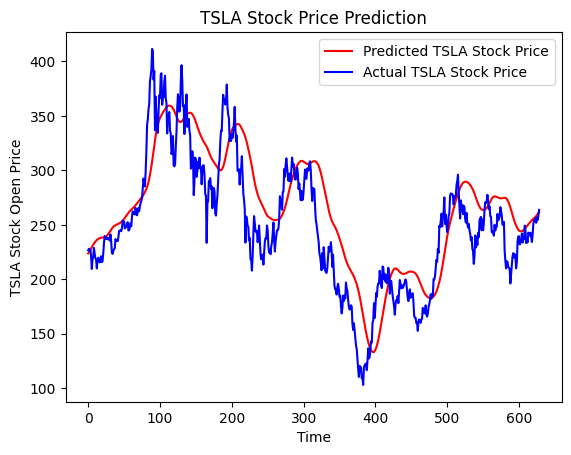

In [155]:
plt.plot(y_pred_org, color='red', label='Predicted TSLA Stock Price')
plt.plot(y_test_org, color='blue', label='Actual TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSLA Stock Open Price')
plt.legend()
plt.show()

In [158]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))

model.save('model.h5')

In [157]:
from keras.models import load_model
import pickle
import numpy as np

# Load the scaler object
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Load the trained model
loaded_model = load_model('model.h5')

# Ask the user to input the required data
user_input = input("Enter your input data (comma-separated): ")

# Convert the user input to a list of floats
user_data = [float(x) for x in user_input.split(",")]

# Reshape the user input data into a 2D array with one row and three columns
user_data_reshaped = np.array(user_data).reshape(1, -1)

# Scale the user input using the loaded scaler object
user_data_scaled = scaler.transform(user_data_reshaped)

# Use the loaded model to make predictions
predictions = loaded_model.predict(user_data_scaled)

# Display the predictions to the user
print("Predicted value:", predictions)

# Inverse transform the predicted value
predicted_value_original_scale = scaler.inverse_transform(predictions)

# Display the predicted value in the original scale
print("Predicted value in original scale:", predicted_value_original_scale[0][0])


1/1 [==============================] - 2s 2s/step
Predicted value: [[0.06127892]]
Predicted value in original scale: 121.90271
